## Орг вопросы

Сессия 20 июня, к началу сессии нужно доделать домашки :)

In [12]:
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Transformer

**Paper:**: [**Attention is all you need**](https://arxiv.org/abs/1706.03762)

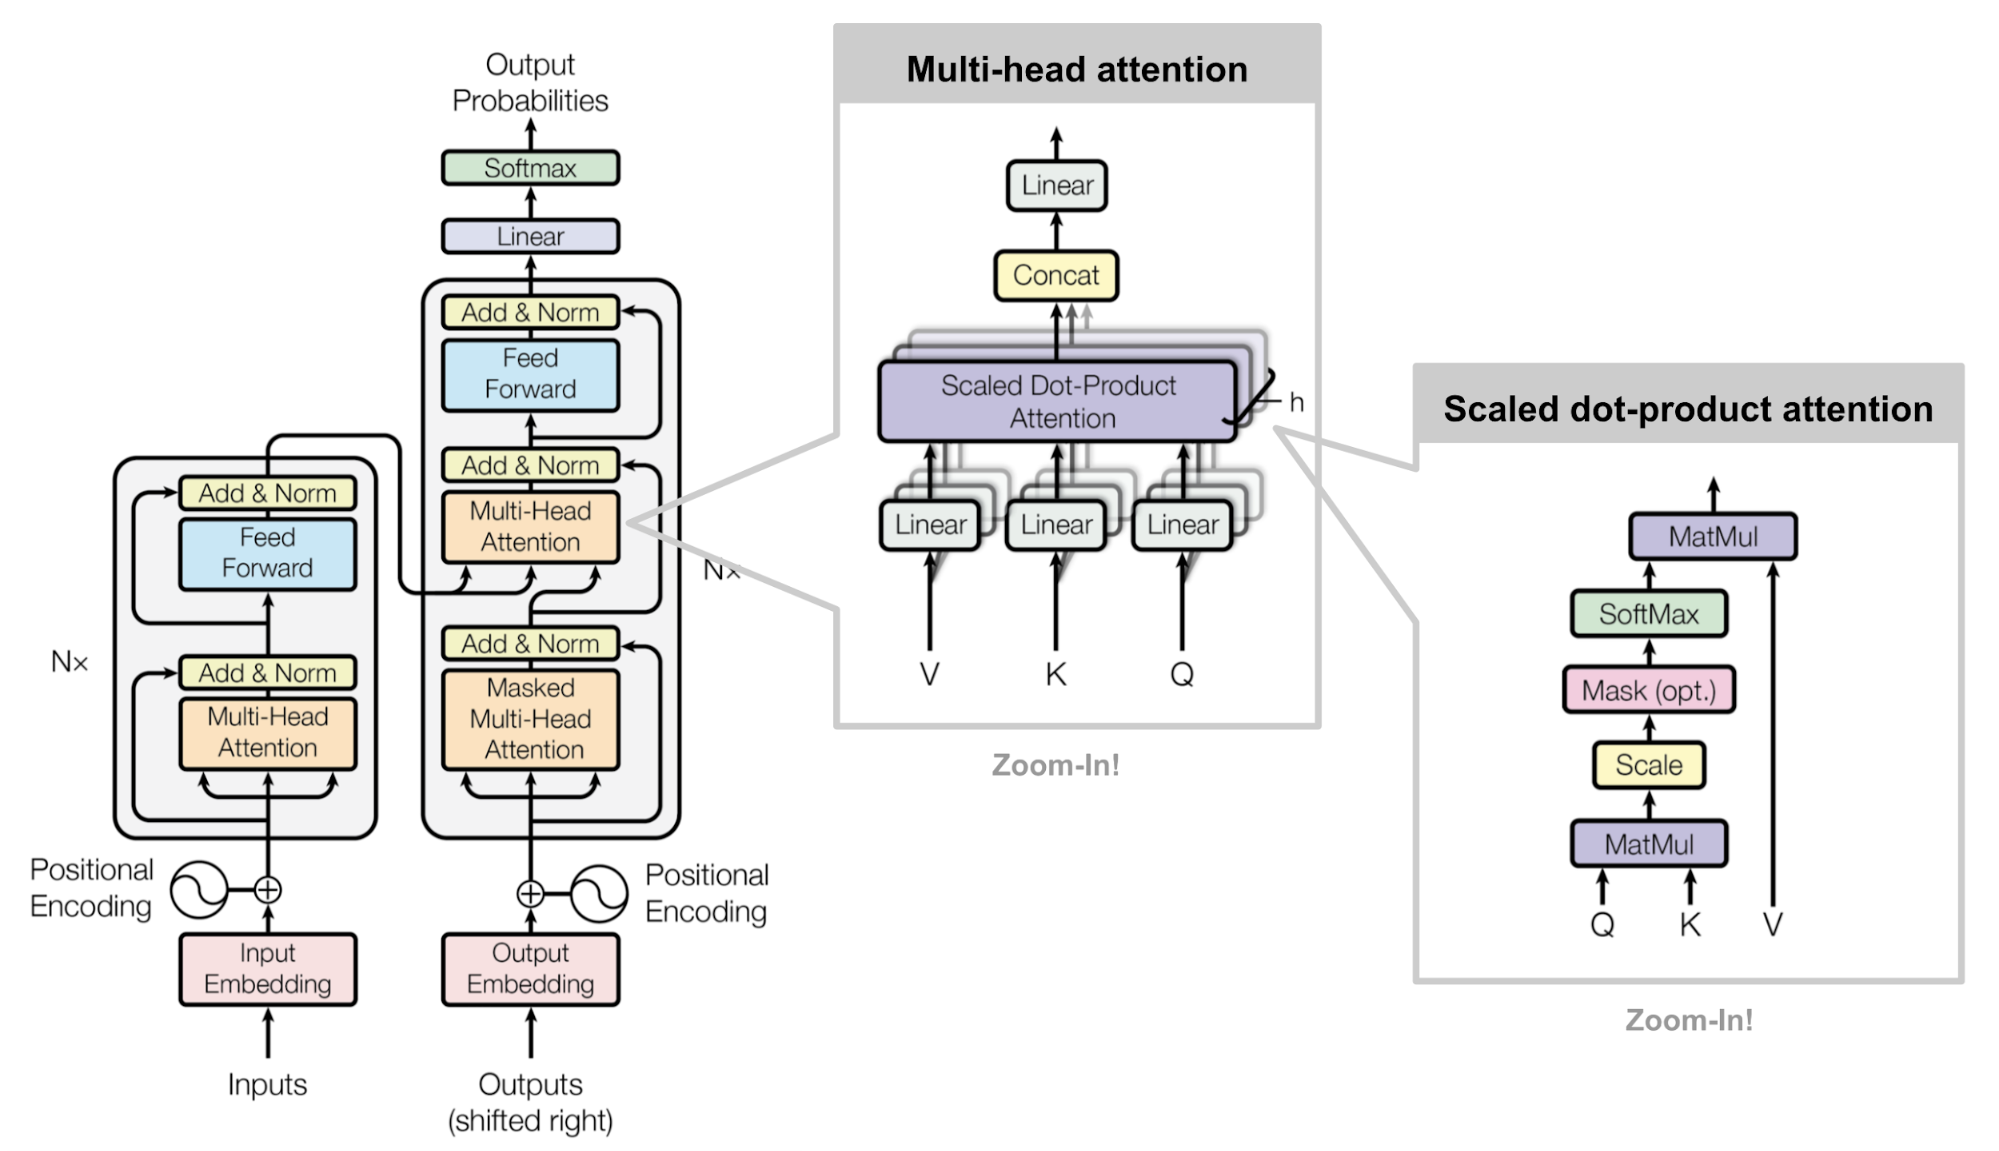

# Attention

Compute attention weights and write the output context vector.
Keep in mind the formula of Attention function in transformers:

                                                                 
$$                                                                         
   \mathrm{Attention}(Q, K, V) = \mathrm{softmax}(\frac{QK^T}{\sqrt{d_k}})V               
$$     

In [4]:
from torch.nn.functional import softmax
import torch
import torch.nn as nn
import math

def self_attention_function(x, w_query, w_key, w_value):
  
    q = x @ w_query     # [ bs, seq_len, query_dim ]
    k = x @ w_key       # [ bs, seq_len, key_dim ]
    v = x @ w_value     # [ bs, seq_len, value_dim ]

    qkt = (q @ k.T)     # [ bs, seq_len, seq_len ]
    qk_scaled = softmax(qkt / math.sqrt(k.size(1)), dim=-1) # [ bs, seq_len, seq_len ]
    context_vector = qk_scaled @ v # [ bs, seq_len, value_dim ]

    return context_vector


Чаще всего `{q,k,v}_dim`  выбирают  одинаковыми

In [ ]:
encoder_embeddings = ...
decoder_embeddings = ...

q, k, v = ...?

attention_function( ??? , w_key, w_query, w_value)

In [ ]:
def attention_function( query, key, value, w_key, w_query, w_value):
  
    q = query @ w_query     # [ bs, q_seq_len, query_dim ]
    k = key   @ w_key       # [ bs, k_seq_len, key_dim ]
    v = value @ w_value     # [ bs, v_seq_len, value_dim ]

    qkt = (q @ k.T)     # [ bs, q_seq_len, k_seq_len ]
    qk_scaled = softmax(qkt / math.sqrt(k.size(1)), dim=-1) # [ bs, q_seq_len, k_seq_len ]

    # как тут перемножаются размерности? какие размерности должны быть одинаковыми?
    context_vector = qk_scaled @ v # [ bs, ?_seq_len, value_dim ]

    return context_vector


### Masked Attention

#### Why?

* padding
* decoder lookahead


**Recap|Flashforward**

In [ ]:
def attention_function( query, key, value, w_key, w_query, w_value, mask=None):
  
    q = query @ w_query     # [ bs, q_seq_len, query_dim ]
    k = key   @ w_key       # [ bs, k_seq_len, key_dim ]
    v = value @ w_value     # [ bs, v_seq_len, value_dim ]

    qkt = (q @ k.T)     # [ bs, q_seq_len, k_seq_len ]
    qk_scaled = softmax(qkt / math.sqrt(k.size(1)), dim=-1) # [ bs, q_seq_len, k_seq_len ]

    if mask is not None:
        qk_scaled = qk_scaled.masked_fill(mask == 0, 0)

    context_vector = qk_scaled @ v # [ bs, ?_seq_len, value_dim ]

    return context_vector


# MultiHeadAttention



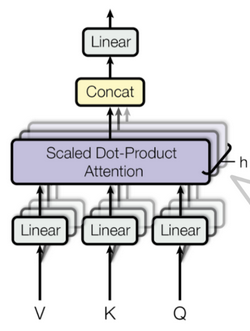

## Attention visualization



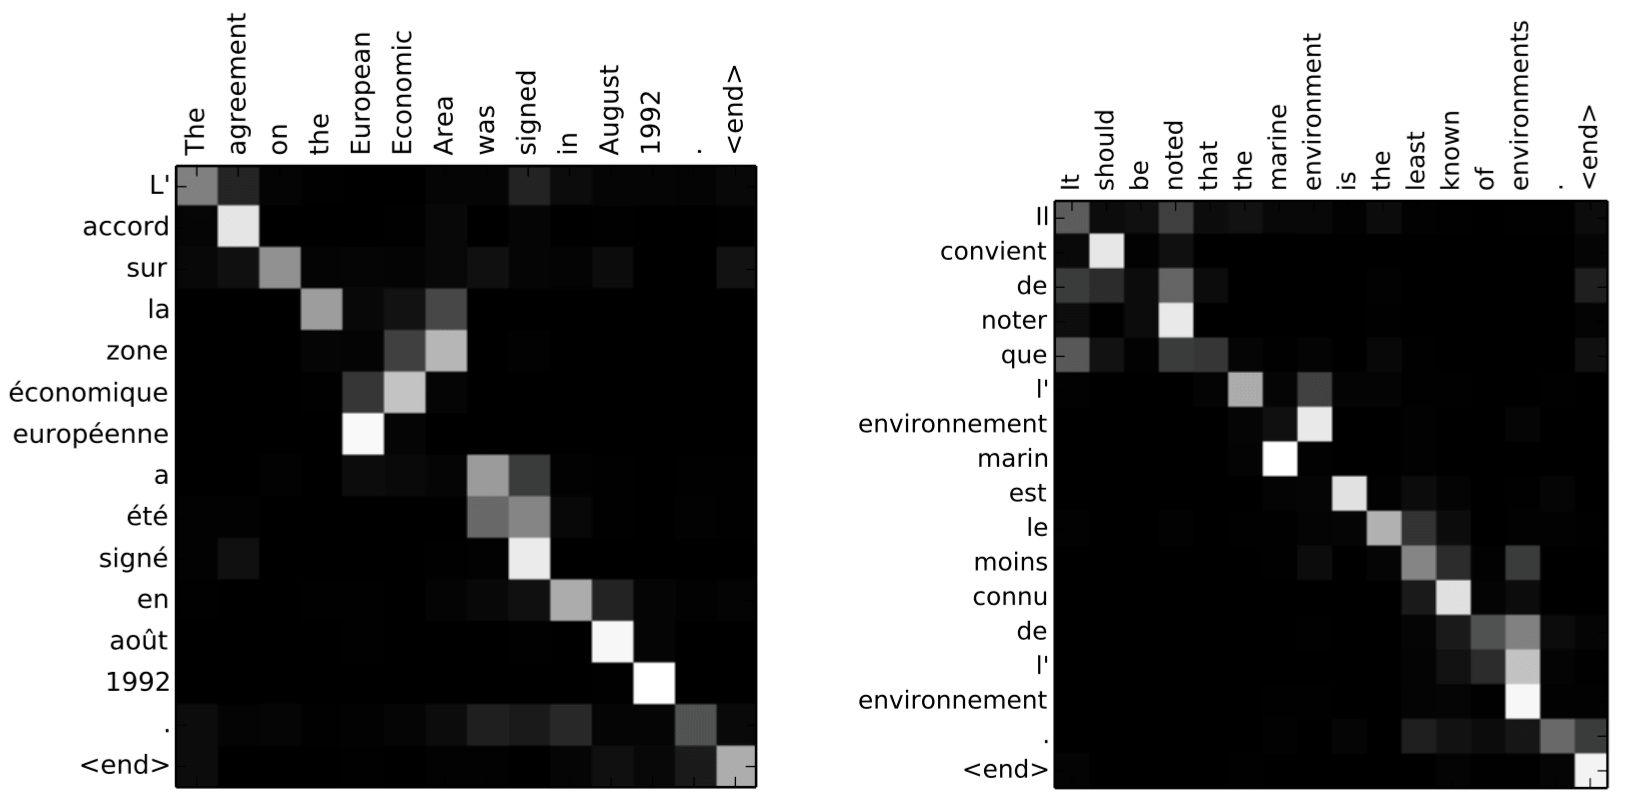

# [Transformer Encoder](https://pytorch.org/docs/master/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder)

In [5]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(10, 32, 512)
out = transformer_encoder(src)

encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
  )
  (linear1): Linear(in_features=512, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [13]:
count_params(encoder_layer) # 3M

3152384

# [Transformer Decoder](https://pytorch.org/docs/stable/generated/torch.nn.TransformerDecoder.html)

In [6]:
decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
memory = torch.rand(10, 32, 512)
tgt = torch.rand(20, 32, 512)
out = transformer_decoder(tgt, memory)

decoder_layer

TransformerDecoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
  )
  (multihead_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
  )
  (linear1): Linear(in_features=512, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (norm3): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (dropout3): Dropout(p=0.1, inplace=False)
)

In [14]:
count_params(decoder_layer) # 4M

4204032

# [Transofrmer](https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html)

In [9]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=2, num_decoder_layers=2)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)

transformer_model

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, in

In [15]:
# Трансформер 6 блоков, всего параметров (без эмбэддингов) = 44M
count_params( nn.Transformer(nhead=8, num_encoder_layers=6, num_decoder_layers=6) )

44140544

In [20]:
# сколько всего параметров в механизме внимания в модели?
# 1M * (num_encoders + 2 * num_decoders)
count_params( transformer_model.decoder.layers[0].multihead_attn )

1050624

# Какую еще важную часть модели мы упустили?

`Embedding`'и --- они могут занимать много памяти. + `PositionalEmbeddings`

In [11]:
embeddings = nn.Embedding(10000, 512)

embeddings

Embedding(10000, 512)

In [17]:
count_params(embeddings) # 5M!

5120000

## Процесс обучения

# [HuggingFace](https://huggingface.co/)

* [quicktour](https://huggingface.co/docs/transformers/quicktour)
* [training](https://huggingface.co/docs/transformers/training)

## Pipeline


In [22]:
!pip install -q transformers

In [23]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [26]:
classifier.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [24]:
classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

## Auto* Classes

In [37]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [28]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [29]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

PreTrainedTokenizerFast(name_or_path='nlptown/bert-base-multilingual-uncased-sentiment', vocab_size=105879, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [30]:
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [31]:
classifier("Nous sommes très heureux de vous présenter la bibliothèque 🤗 Transformers.")


[{'label': '5 stars', 'score': 0.7272651791572571}]

### Training (Finetuning)

In [ ]:
!pip install -q datasets

In [38]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")
dataset["train"][100]


Reusing dataset yelp_review_full (/root/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/13c31a618ba62568ec8572a222a283dfc29a6517776a3ac5945fb508877dde43)


  0%|          | 0/2 [00:00<?, ?it/s]

{'label': 0,
 'text': 'My expectations for McDonalds are t rarely high. But for one to still fail so spectacularly...that takes something special!\\nThe cashier took my friends\'s order, then promptly ignored me. I had to force myself in front of a cashier who opened his register to wait on the person BEHIND me. I waited over five minutes for a gigantic order that included precisely one kid\'s meal. After watching two people who ordered after me be handed their food, I asked where mine was. The manager started yelling at the cashiers for \\"serving off their orders\\" when they didn\'t have their food. But neither cashier was anywhere near those controls, and the manager was the one serving food to customers and clearing the boards.\\nThe manager was rude when giving me my order. She didn\'t make sure that I had everything ON MY RECEIPT, and never even had the decency to apologize that I felt I was getting poor service.\\nI\'ve eaten at various McDonalds restaurants for over 30 years. 

In [39]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = dataset.map(tokenize_function, batched=True)

Loading cached processed dataset at /root/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/13c31a618ba62568ec8572a222a283dfc29a6517776a3ac5945fb508877dde43/cache-a9ff008ff2e851c3.arrow


  0%|          | 0/50 [00:00<?, ?ba/s]

In [42]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

In [40]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [41]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")


In [43]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


In [44]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 375


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: ignored

# [FairSeq](https://github.com/pytorch/fairseq)

Если надо попробовать уже готовые модельки или есть идеи, как их можно улучшить


```
fairseq-train \
    data-bin/wmt14_en_de_distill \
    --save-dir checkpoints \
    --ddp-backend=legacy_ddp \
    --task translation_lev \
    --criterion nat_loss \
    --arch levenshtein_transformer \
    --noise random_delete \
    --share-all-embeddings \
    --optimizer adam --adam-betas '(0.9,0.98)' \
    --lr 0.0005 --lr-scheduler inverse_sqrt \
    --stop-min-lr '1e-09' --warmup-updates 10000 \
    --warmup-init-lr '1e-07' --label-smoothing 0.1 \
    --dropout 0.3 --weight-decay 0.01 \
    --decoder-learned-pos \
    --encoder-learned-pos \
    --apply-bert-init \
    --log-format 'simple' --log-interval 100 \
    --fixed-validation-seed 7 \
    --max-tokens 8000 \
    --save-interval-updates 10000 \
    --max-update 300000
```

# Еще материалы

### Материалы по трансформерам

Код с комментариями и подробным разбором. Хотя имхо код не самый качественный, общую идею уловить можно.
http://nlp.seas.harvard.edu/2018/04/03/attention.html

https://jalammar.github.io/illustrated-transformer/

### Войта

* [seq2seq_and_attention](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html)
* [the-story-of-heads](https://github.com/lena-voita/the-story-of-heads)

### HF Course

https://huggingface.co/course/


### Гугл)

Погуглите, если что-то еще интересно, или если хочется найти больше инфы по какой-то теме


# Блиц

## В чем различие механизм внимания и подхода с RNN? Какую проблему решает механизм внимания? Чем мы жертвуем для решения этой проблемы?

## Сколько раз надо запустить Encoder, чтобы получить эмбэддинг последовательности?

## Сколько раз надо запустить Decoder, чтобы сгенерировать последовательность длинны `M`, если длинна исходной последовательности `N`?

## Сколько раз нужно запустить Encoder в процессе обучения?

## Сколько раз нужно запустить Decoder в процессе обучения?

## Сколько раз запускается RNN в процессе обучения?

## Сколько раз запускается RNN в процессе вычисления?

## Где и как еще можно применить механизм внимания?
